# Illustration of a particle filter analysis

* Emmanuel Cosme, 2017
* Particle filter analysis


## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prior ensemble

We consider a physical system described by two variables. In the cell below, we form an ensemble of possible realizations of this system, based on prior statistical parameters.

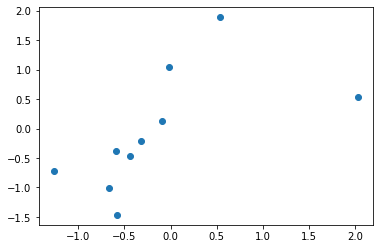

In [22]:
mu = np.zeros(2) #the means of the enssemble in two dimession
pmat = np.array([[1., 0.5], [0.5, 1.]]) #intervals for the enssemble
Nmem = 10 #number of members
xxb = np.random.multivariate_normal(mu, pmat, Nmem) #creates a random 2D array with the conditions. 
plt.plot(xxb[:,0], xxb[:,1], 'o')

## 2. Likelihood function and particle filter analysis function

Our likelihood function is a Gaussian. The particle filter analysis makes use of the likelihood function. Note the the particle analysis function generates prints that can be commented.

In [4]:
def likelihood(y_in, yo_in, Ro_in):
    """
    Ro_in = covariance matrix of the obs.
    y_in
    
    """
    innovation = yo_in - y_in
    invRo = np.linalg.inv(Ro_in)
    xtmp = np.dot(invRo, innovation)
    xtmp = -0.5 * np.dot(innovation, xtmp)
    xtmp = np.exp(xtmp)
    return xtmp

def particle_filter_analysis(xxb_in, Ho_in, yo_in, Ro_in):
    """Perform particle filter analysis"""
    Nm = np.shape(xxb_in)[0]     # ensemble size
    
    ## Computation of weights
    weight = np.zeros(Nm)
    yyb = np.inner(Ho_in, xxb_in)
    for i in range(Nm):
        weight[i] = likelihood( yyb[:,i], yo_in, Ro_in )
    weight /= np.sum(weight)
    print(weight)
    
    ## Resampling (Kitagawa method), not including dispersion
    indices=[0]*Nm
    cdf = np.zeros(Nm)
    for i in range(Nm):
        cdf[i] = np.sum(weight[:i+1])
    urand = np.random.random()/Nm
    for i in range(Nm):
        indices[i] = np.searchsorted(cdf, urand)
        urand += 1./Nm
    xxa_out = xxb_in[indices,:]
    print(indices)
    return xxa_out

The gauss2D function below is for plots only.

In [5]:
def gauss2D(x_in, y_in, mu, mat, dx):
    """Compute 2D Gaussian function.
    x and y are meshgrid arrays."""
    gout = np.zeros_like(x_in)
    gs = np.shape(gout)
    invmat = np.linalg.inv(mat)
    for j in range(gs[1]):
        for i in range(gs[0]):
            xtmp = np.array([ x_in[i,j], y_in[i,j] ])
            xtmp = xtmp - mu
            xtmp2 = np.dot(invmat, xtmp)
            xtmp = np.dot(xtmp,xtmp2)
            xtmp = -0.5 * xtmp
            xtmp = np.exp(xtmp)
            gout[i,j] = xtmp
    intgs = np.sum(gout)*dx
    gout /= intgs
    return gout

## 3. Particle filter analysis

We process a newly collected observation of the system, noted $yo$ with covariance matrix $Ro$, with a particle filter analysis. On the figure, the selected particle are in red. The likelihood is shaded in grey (The gauss2D function is used here). Note in the prints that without dispersion, many analysed particles are equal to each other.

[1.32509921e-27 3.29302367e-01 2.53248935e-25 4.36731264e-13
 2.44746415e-15 7.18740236e-06 2.09411690e-07 6.69303881e-01
 2.09055345e-06 1.38426512e-03]
[1, 1, 1, 1, 7, 7, 7, 7, 7, 7]


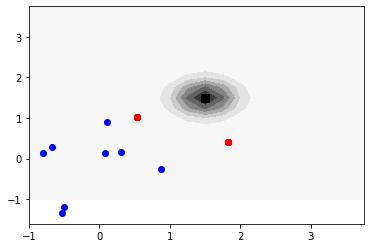

In [24]:
mu = np.zeros(2) #the means of the enssemble in two dimession
pmat = np.array([[1., 0.5], [0.5, 1.]]) #intervals for the enssemble
Nmem = 10 #number of members
xxb = np.random.multivariate_normal(mu, pmat, Nmem) #creates a random 2D array with the conditions. 

Ho = np.eye(2)
yo = np.array([1.5, 1.5])
Ro = 0.09*np.eye(2)
xxa = particle_filter_analysis(xxb, Ho, yo, Ro)

X = np.arange(-1., 4., 0.25)
Y = np.arange(-1., 4., 0.25)
X, Y = np.meshgrid(X, Y)
Z = gauss2D(X, Y, yo, Ro, 0.25)
plt.figure()
plt.plot(xxb[:,0], xxb[:,1], 'bo', markersize=6)
plt.plot(xxa[:,0], xxa[:,1], 'ro', markersize=6)
plt.contourf(X,Y,Z,cmap='Greys')
plt.plot(yo[0], yo[1], 'ks', markersize=8)
plt.show()

## 4. To be continued...

Resampling in the particle filter analysis allows us to preserve ensemble size, but many ensemble members are similar (there actually are 10 red dots on the figure above, all superposed to each other). In realistic implementations, it is essential to introduce a process that regenerates the ensemble after the analysis. This can be done by simulating the model error during the next forecast step. 